In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#disclaimer: ChatGPT was used as a guide

#QUESTION 1.1: For clean up, I removed commas (for prices above $999 and $). I then converted the variable to numeric so that computations can be done if necessary. Finally, I identified the number of missing values and removed them. 
airbnb = pd.read_csv('./airbnb_hw.csv', low_memory=False)

airbnb.columns
airbnb.head()
airbnb['Price'].head()

#removing $ and commas:
airbnb['PriceClean'] = (
    airbnb['Price']
    .str.replace('$','', regex=False)
    .str.replace(',', '', regex=False)
)

In [20]:
#disclaimer: ChatGPT was used as a guide
#currently Price is an object/string; I am going to make this numeric so that computations can be done if needed
airbnb['PriceClean'] = pd.to_numeric(
    airbnb['PriceClean'],
    errors='coerce' #to avoid including errorous data in the numeric conversion
)

In [21]:
#disclaimer: ChatGPT was used as a guide
#here we are identifying how many missing price values there are:
missingPrice = airbnb['PriceClean'].isna().sum()
print("Number of missing prices:", missingPrice)
#we see that there is 181 missing prices.

Number of missing prices: 181


In [26]:
#disclaimer: ChatGPT was used as a guide
#dropping missing prices
airbnb = airbnb.dropna(subset=['PriceClean'])

#checking if drop was successful: 
missingPrice = airbnb['PriceClean'].isna().sum()
print("Number of missing prices:", missingPrice)

Number of missing prices: 0


In [35]:
#disclaimer: ChatGPT was used as a guide
#QUESTION 1.2: We are cleaning up the data by identifying missing data and then cross-tabulating it with another variable type to see if there was a systemic removal of the data

mn = pd.read_csv('mn_police_use_of_force.csv', low_memory=False)

#here we are identifying how many missing values there are (NaN)
mn['subject_injury'].value_counts(dropna=False)

#here we are officially "cleaning" by maintaining Yes and No values
mn['subject_injury_clean'] = mn['subject_injury'].replace({
    'Yes': 'Yes',
    'No': 'No'
})

#here we are calculating the proportion of missing values
missingProp = mn['subject_injury_clean'].isna().mean()
print(f"Proportion of missing values: {missingProp:.2%}")

#since there is such a large % of missing values (76.19%), that is most definitely a concern. 
#this means that analysis will be lacking all the information and so any conclusions that are made will be biased

#now we will cross-tabulate with force_type variable:
force_cross = pd.crosstab(
    mn['force_type'],
    mn['subject_injury_clean'],
    margins=True
)
print(force_cross)

#now we will identify patterns:
missing_by_force = pd.crosstab(
    mn['force_type'],
    mn['subject_injury_clean'].isna(),
    normalize='index'
)
missing_by_force.columns = ['Not Missing', 'Missing']
print(missing_by_force)


Proportion of missing values: 76.19%
subject_injury_clean      No   Yes   All
force_type                              
Baton                      0     2     2
Bodily Force            1093  1286  2379
Chemical Irritant        131    41   172
Firearm                    2     0     2
Gun Point Display         33    44    77
Improvised Weapon         34    40    74
Less Lethal Projectile     1     2     3
Police K9 Bite             2    44    46
Taser                    150   172   322
All                     1446  1631  3077
                             Not Missing   Missing
force_type                                        
Baton                           0.500000  0.500000
Bodily Force                    0.252280  0.747720
Chemical Irritant               0.107972  0.892028
Firearm                         1.000000  0.000000
Gun Point Display               0.740385  0.259615
Improvised Weapon               0.500000  0.500000
Less Lethal                     0.000000  1.000000
Less Lethal 

In [ ]:
#here we can see that there are some force types like baton, bodily force, chemical irritant, improvised weapon, taser, maximal restraint, and less lethal have at least 50% of their data missing... these types of force are less conventional and could be seen as unethical, which could be why it "missing."
#on the other hand, some force types like firearm and less lethal projetile have complete data. This means that there is a conscious effort to remove data, which is even more concerning when you pair it with the fact that for 76.19% of the data, we do not know whether the person was injuried or not injured by the police.

In [48]:
#disclaimer: ChatGPT was used as a guide
#QUESTION 1.3: Made a numeric code, checked missing values, and converted to dummy

pretrial = pd.read_csv('pretrial.csv', low_memory=False)

pretrial['WhetherDefendantWasReleasedPretrial'].value_counts(dropna=False)

# Map numeric codes
# 1 = Yes (released), 0 = No (not released), 9 = missing/unknown
pretrial['ReleasedPretrial_clean'] = pretrial['WhetherDefendantWasReleasedPretrial'].map({
    1: 'Yes',
    0: 'No',
    9: np.nan
})

#checking missing values
missing_count = pretrial['ReleasedPretrial_clean'].isna().sum()
missing_prop = pretrial['ReleasedPretrial_clean'].isna().mean()
print(f"Missing count: {missing_count}")
print(f"Proportion missing: {missing_prop:.2%}")

#converting to numeric dummy
pretrial['ReleasedPretrial_dummy'] = pretrial['ReleasedPretrial_clean'].map({'Yes': 1, 'No': 0})

#inspecting results
print(pretrial[['WhetherDefendantWasReleasedPretrial', 'ReleasedPretrial_clean', 'ReleasedPretrial_dummy']].head(10))




Missing count: 31
Proportion missing: 0.13%
   WhetherDefendantWasReleasedPretrial ReleasedPretrial_clean  \
0                                    9                    NaN   
1                                    0                     No   
2                                    0                     No   
3                                    0                     No   
4                                    1                    Yes   
5                                    0                     No   
6                                    1                    Yes   
7                                    1                    Yes   
8                                    0                     No   
9                                    1                    Yes   

   ReleasedPretrial_dummy  
0                     NaN  
1                     0.0  
2                     0.0  
3                     0.0  
4                     1.0  
5                     0.0  
6                     1.0  
7               

In [50]:
#disclaimer: ChatGPT was used as a guide
#QUESTION 1.4: data was cleaned by replacing invalid values with np.nan. We see that invalid values include blank cells, placeholder codes like NA or non-applicable cases like fines or probation, where there is no sentence charged.

# Look at unique values
pretrial['ImposedSentenceAllChargeInContactEvent'].value_counts(dropna=False)

pretrial['SentenceTypeAllChargesAtConvictionInContactEvent'].value_counts(dropna=False)

# Step 1: Replace invalid values with np.nan
# Often -1 or 999 or 0 might indicate missing / unknown
pretrial['ImposedSentence_clean'] = pd.to_numeric(
    pretrial['ImposedSentenceAllChargeInContactEvent'],
    errors='coerce'
)

# Step 2: Check missing values
missing_count = pretrial['ImposedSentence_clean'].isna().sum()
missing_prop = pretrial['ImposedSentence_clean'].isna().mean()
print(f"Missing count: {missing_count}")
print(f"Proportion missing: {missing_prop:.2%}")

# Cross-tab missingness with sentence type
missing_by_type = pd.crosstab(
    pretrial['SentenceTypeAllChargesAtConvictionInContactEvent'],
    pretrial['ImposedSentence_clean'].isna(),
    normalize='index'
)
missing_by_type.columns = ['Not Missing', 'Missing']
print(missing_by_type)


Missing count: 9053
Proportion missing: 39.38%
                                                  Not Missing  Missing
SentenceTypeAllChargesAtConvictionInContactEvent                      
0                                                         1.0      0.0
1                                                         1.0      0.0
2                                                         1.0      0.0
4                                                         0.0      1.0
9                                                         0.0      1.0


After drops: (39070, 23)
Year range: 0.0 to 2026.0


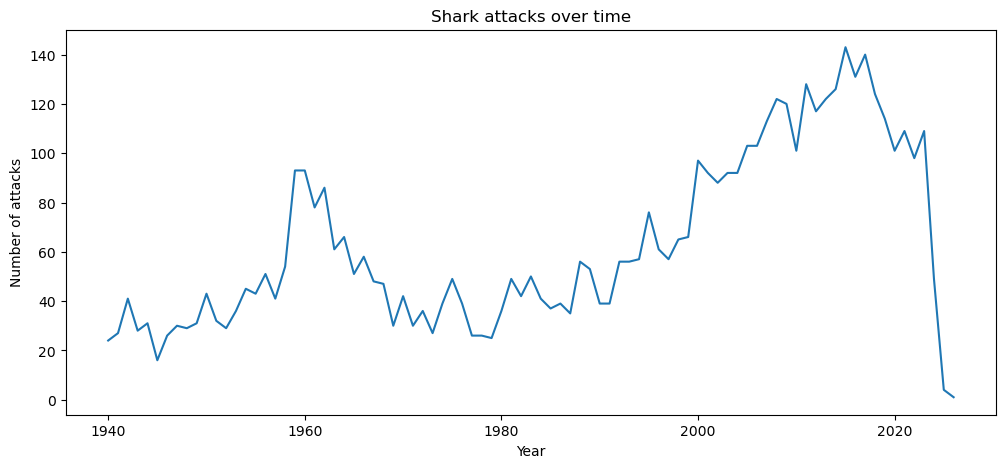

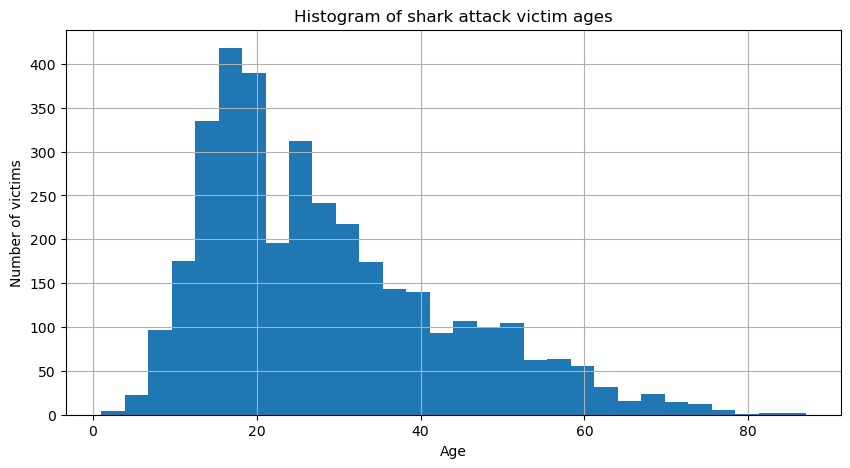

Proportion of victims who are male: 78.74%
Proportion of attacks that are unprovoked: 74.29%


In [11]:
#disclaimer: ChatGPT was used as a guide
#QUESTION 2:

import pandas as pd
import matplotlib.pyplot as plt

shark = pd.read_csv('sharks.csv', low_memory=False)

#drop columns with all missing values
shark = shark.dropna(axis=1, how='all')
print('After drops:', shark.shape)

# Convert to numeric, coercing errors to NaN
shark['Year'] = pd.to_numeric(shark['Year'], errors='coerce')

# Check range
print("Year range:", shark['Year'].min(), "to", shark['Year'].max())

# Filter to attacks since 1940
shark_recent = shark[shark['Year'] >= 1940]

# Optional: count attacks by decade
attacks_by_year = shark_recent['Year'].value_counts().sort_index()
attacks_by_year.plot(kind='line', figsize=(12,5), title='Shark attacks over time')
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.show()



#AGE
# Filter attacks since 1940 and make a safe copy
shark_recent = shark[shark['Year'] >= 1940].copy()

# Clean Age column
shark_recent['Age'] = pd.to_numeric(shark_recent['Age'], errors='coerce')


# Histogram of victim ages
plt.figure(figsize=(10,5))
shark_recent['Age'].hist(bins=30)
plt.xlabel('Age')
plt.ylabel('Number of victims')
plt.title('Histogram of shark attack victim ages')
plt.show()





# Clean Gender column (assuming 'Sex' or similar column)
shark_recent['Sex'] = shark_recent['Sex'].str.strip().str.upper()
male_prop = (shark_recent['Sex'] == 'M').mean()
print(f"Proportion of victims who are male: {male_prop:.2%}")




# Keep only three values: 'Provoked', 'Unprovoked', 'Unknown'
shark_recent['Type_clean'] = shark_recent['Type'].str.strip().str.capitalize()
shark_recent['Type_clean'] = shark_recent['Type_clean'].replace({
    'Boating': 'Unknown',
    'Sea disaster': 'Unknown',
    'Invalid': 'Unknown',
    '': 'Unknown'
})

# Proportion of unprovoked attacks
unprovoked_prop = (shark_recent['Type_clean'] == 'Unprovoked').mean()
print(f"Proportion of attacks that are unprovoked: {unprovoked_prop:.2%}")




fatal_col = [c for c in shark_recent.columns if 'FATAL' in c.upper()][0]  # find the fatal column
shark_recent['Fatal_clean'] = shark_recent[fatal_col].astype(str).str.strip().str.upper()
shark_recent['Fatal_clean'] = shark_recent['Fatal_clean'].replace({
    'UNKNOWN': 'Unknown',
    'N': 'N',
    'Y': 'Y'
})


In [73]:
#disclaimer: ChatGPT was used as a guide
#are sharks more likely to attack men or women?
pd.crosstab(shark_recent['Type_clean'], shark_recent['Sex'], normalize='columns')

Sex,F,LLI,M,M X 2
Type_clean,,,,
?,0.000000,0.0,0.000233,0.0
Provoked,0.039886,0.0,0.104060,0.0
Questionable,0.004274,0.0,0.004200,0.0
Under investigation,0.001425,0.0,0.000000,0.0
Unknown,0.086895,0.0,0.092627,1.0
Unprovoked,0.854701,1.0,0.772515,0.0
Unverified,0.000000,0.0,0.000233,0.0
Watercraft,0.012821,0.0,0.026132,0.0


In [70]:
#disclaimer: ChatGPT was used as a guide
#fatality by type
pd.crosstab(shark_recent['Type_clean'], shark_recent['Fatal_clean'], normalize='index')


Fatal_clean,2017,F,M,N,NAN,NQ,Unknown,Y,Y X 2
Type_clean,,,,,,,,,
?,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Boat,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Provoked,0.001931,0.000000,0.001931,0.957529,0.007722,0.000000,0.005792,0.025097,0.000000
Questionable,0.000000,0.090909,0.000000,0.636364,0.090909,0.000000,0.000000,0.181818,0.000000
Unconfirmed,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
Under investigation,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Unknown,0.000000,0.000000,0.000000,0.116487,0.681004,0.000000,0.000000,0.200717,0.001792
Unprovoked,0.000000,0.000493,0.000247,0.819640,0.002961,0.000247,0.008882,0.167530,0.000000
Unverified,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [71]:
#disclaimer: ChatGPT was used as a guide
#fatality by gender
pd.crosstab(shark_recent['Sex'], shark_recent['Fatal_clean'], normalize='index')


Fatal_clean,2017,F,M,N,NAN,NQ,Unknown,Y,Y X 2
Sex,,,,,,,,,
F,0.000000,0.000000,0.000000,0.793201,0.07932,0.001416,0.002833,0.123229,0.0
LLI,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.0
M,0.000233,0.000931,0.000698,0.774209,0.06797,0.000000,0.005121,0.150838,0.0
M X 2,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.0


In [7]:
#disclaimer: ChatGPT was used as a guide
#white sharks, all in one block

# Automatically detect species column
species_cols = [c for c in shark_recent.columns if 'SPECIES' in c.upper() or 'SHARK' in c.upper()]
if len(species_cols) == 0:
    print("No species column found; skipping white shark proportion.")
else:
    species_col = species_cols[0]

    # Make everything lowercase and fill missing
    shark_recent[species_col] = shark_recent[species_col].astype(str).str.lower().fillna('unknown')

# Function to detect if 'white' appears in any word of species
def contains_white(species_entry):
    words = species_entry.split()  # splits string into list of words
    return 'white' in words

# Apply to the column
white_shark_flag = shark_recent[species_col].apply(contains_white)

# Proportion of attacks by white sharks
white_shark_prop = white_shark_flag.mean()
print(f"Proportion of attacks by white sharks: {white_shark_prop:.2%}")

Proportion of attacks by white sharks: 12.13%


In [ ]:
#QUESTION 2, con't

#Range of values for years: 0 to 140 shark attacks per year
#Attacks were increasing until 2020, where we see attacks decreasing over time 
#Proportion of victims who are male: 78.74%
#Proportion of attacks that are unprovoked: 74.29%
#Sharks are more likely to launch unprovoked attacks on women
#The attack is more likely to be fatal when the attack is unprovoked and less likely to be fatal when the attack is provoked
#The attack is more likely to be fatal if the victim is male
#I feel that sharks are widely misunderstood creatures and that if we leave them alone, then they will leave us alone.. although the data seems to indicate otherwise
#Proportion of attacks by white sharks: 12.13%

In [8]:
#QUESTION 3:

#1. This paper is about data tidying, where with the use of tidy datasets, you can easily model and visualize data using a specific framework for data cleaning and, thus, subsequent analysis.
#2. The tidy data standard is meant to support the initial exploration and analysis of data, and to simplify how we can develop data analysis tools that work together.
#3a. If a dataset is tidy, then they all have a standard structure that makes them look organized and similar, just like members in a happy family. However, if data is messy, then it can be messy in many different ways, whether it is disorganized, the variables are too ambiguous, etc. So, a messy dataset is like an unhappy family where everyone has their unique issues.
#3b. In a dataset, you can easily understand what an observation is (the rows) and what the variables are (the columns). We understand that observations are the subjects being measured and the variables are the types of measurements we are dealing with. However, it is hard to make a general definition because in each dataset, observations and variables can mean different things depending on what the data came from, is being used for, and the way it was collected.
#4. Values are usually numbers or strings that can be organized into a variable and an observation. A variable has all the values that are categorized under the same attribute for all units (like height, weight). An observation has all the values measured on the same unit across all attributes.
#5. Tidy data is "a standard way of mapping the meaning of a dataset to its structure." Datasets can be either tidy or messy depending on how it is organized and how well the tables match the observations and variables. It is standard that for tidy data, each variable forms a column, each observation forms a row and each type of observational unit forms a table. 
#6a. The five most common problems include clolumn headers that are values and not variable names, multiple variables are stored in one column, variables are stored in both rows and columns, multiple types of observational units are stored in the same table, and a sngle observational unit is stored in multiple tables.
#6b. Table 4 is messy because the variable "income" is not a column and is rather spread across many headers and so frequency is also all over the place. For a tidy dataset, all variables must be columns.
#6c. Melting a dataset is when we turn columns into rows, where you are left with a molten dataset. Some columns stay colvars and others are collapsed to a new variable called "column" that has all the column headings and another variable called "value" which has all the concatenated values from the columns that were previously separated.
#7a. Table 11 is messy because the days are column names when instead, each day should be under a column that says "day" so as to avoid all the observations being spread over so many columns.
#7b. Table 12b is tidy because each row represents a single observation and each column represents a variable whereas Table 12a is molten because the original var names are stored within the "element" column and the other measurements are in one value column. 
#8. The "chicken-egg" problem is that tidy data is only as helpful as the tools that one can use with it, which means that tidy tools are fundamentally connected with tidy data. Wickham hopes that in the future, we can use different methodologies of user-testing, ethnography, talk-aloud protocols from human factors, user-centered design, and human-computer interactions communities to improve our knowledge on the more cognitive side of data analysis so that we can further improve tools.
